# Basic Operations on Images

## Goal
- 픽셀 값에 접근하고 수정하는 방법을 배운다.
- 이미지 속성에 접근하는 방법을 배운다.
- Region of Interest(ROI)를 설정하는 방법을 배운다.
- 이미지를 나누고 합치는 방법을 배운다.

여기서 다루는 거의 모든 내용은 OpenCV보다는 Numpy에 주로 관련된다. OpenCV와 함께 더 최적화된 코드를 작성하기 위해서는 Numpy의 깊은 지식이 필요하다.

### Accessing and Modifying pixel values

먼저 컬러 이미지를 불러온다.

In [1]:
import cv2
import numpy as np

img = cv2.imread('./images/messi5.jpg')
img_gray = cv2.imread('./images/messi5.jpg', cv2.IMREAD_GRAYSCALE)

픽셀 값은 이미지의 행과 열의 좌표를 통해 접근할 수 있다.

BGR 이미지에서는, Blue, Green, Red값의 행렬 형태로 반환되며 grayscale 이미지에서는 해당 위치의 intensity가 반환된다.

In [2]:
# (100, 100) 위치의 BGR 픽셀 값
px = img[100, 100]
print(px)

# (100, 100) 위치의 Blue 픽셀 값
px_blue = img[100, 100, 0]
print(px_blue)

# (100, 100) 위치의 grayscale 픽셀 값
px_gray = img_gray[100, 100]
print(px_gray)

[157 166 200]
157
175


같은 방법으로 픽셀 값을 수정할 수 있다.

In [3]:
# (100, 100) 위치의 BGR 픽셀 값을 255, 255, 255로 수정
img[100, 100] = [255, 255, 255]
print(img[100, 100])

[255 255 255]


#### Warning
Numpy는 빠른 행렬 연산에 최적화된 라이브러리이므로 위의 예제처럼 단순히 픽셀 값 하나하나를 접근해서 수정하는 것은 아주 느리며 권장되지 않는다.

#### Note
위의 방법은 첫 5행과 마지막 3열을 선택하는 것과 같이 행렬의 영역을 선택할 때 일반적으로 사용되는 방법이다.

만약 각 픽셀에 접근해야 하는 경우에는, Numpy의 array method인 `array.item()`, `array.itemset()`이 권장된다. 이는 항상 스칼라 값을 반환하기 때문에 RGB 값 모두에 접근해야 한다면, `array.item()`을 각 값에 대해 호출해야 한다.

픽셀 값에 접근하고 수정하는 더 좋은 방법은 다음과 같다.

In [4]:
# (10, 10) 위치의 Red 픽셀 값
print(img.item(10, 10, 2))

# (10, 10) 위치의 Red 픽셀 값 수정
img.itemset((10, 10, 2), 100)
print(img.item(10, 10, 2))

59
100


### Accessing Image Properties

이미지 속성에는 행, 열, 채널의 수, 이미지 데이터의 자료형, 픽셀 수 등이 있다.

이미지의 shape는 `img.shape`를 통해 접근할 수 있다. 컬러 이미지의 경우 행, 열, 채널의 수를 tuple 형태로 반환한다. grayscale 이미지의 경우 행, 열의 수만 반환한다.

In [5]:
# color
print(img.shape)

# grayscale
print(img_gray.shape)

(342, 548, 3)
(342, 548)


전체 픽셀 수는 `img.size`를 통해 접근할 수 있다.

In [6]:
print(img.size)

562248


이미지 데이터의 자료형은 `img.dtype`을 통해 알 수 있다. 

`img.dtype`은 특히 디버깅에서 중요한데 그 이유는 OpenCV-Python에서 많은 에러는 invalid datatype에서 일어나기 때문이다.

In [7]:
print(img.dtype)

uint8


### Image ROI

가끔 이미지의 특정 영역(region)에서 작업을 해야 하는 경우가 있다.

eye detection의 경우, 먼저 전체 이미지에서 face detection을 수행한다. face가 얻어지면 전체 이미지 대신 face region을 대상으로 eye를 찾는다. 

위의 과정은 정확도(eye는 항상 face에 있기 때문)와 성능(좁은 영역을 대상으로 찾기 때문)을 향상시킨다.

ROI는 Numpy indexing을 통해 얻을 수 있다. 여기서는 공을 선택하고 다른 영역으로 복사해본다.

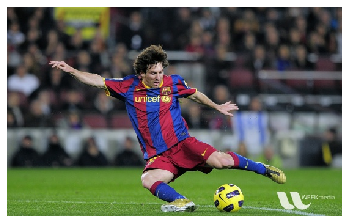

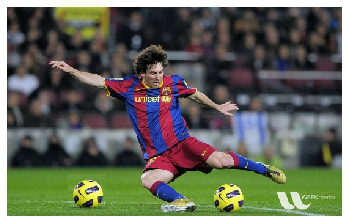

In [5]:
import matplotlib.pyplot as plt

messi = cv2.imread('./images/messi5.jpg')
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)

plt.imshow(messi), plt.axis('off')
plt.show()

ball = messi[280:340, 330:390]
messi[273:333, 100:160] = ball

plt.imshow(messi) , plt.axis('off')
plt.show()

### Splitting and Merging Image Channels

가끔 B,G,R 채널을 따로 작업해야 하는 경우가 있다. 이러한 경우, BGR 이미지를 단일 채널로 분리해야 한다. 또한 반대로 단일 채널들을 BGR 이미지로 합쳐야 하는 경우도 있다.

이러한 작업은 다음을 통해 수행될 수 있다.

In [9]:
img = cv2.imread('./images/messi5.jpg')

# BGR 채널 분리
b, g, r = cv2.split(img)
# 분리된 채널을 다시 BGR 채널로 합치기
img = cv2.merge((b, g, r))

또는 다음의 Numpy indexing을 통해 수행할 수도 있다.

In [10]:
# blue 채널 분리
b = img[:, :, 0]

# red 채널을 0으로 만들기
img[:, :, 2] = 0

#### Warning
`cv2.split()`은 비용이 큰 연산이므로 반드시 필요한 경우에만 사용하여야 한다.

굳이 모든 채널을 분리할 필요가 없다면 Numpy indexing을 사용하자.

### Making Borders for Images (Padding)

만약 사진의 프레임처럼 이미지에 border를 만들어야 한다면, `cv2.copyMakeBorder()`를 사용할 수 있다. 이는 convolution 연산이나 zero padding 등의 적용에 사용된다. 이 함수는 다음의 인자를 받는다.

- **src** - input image
- **top, bottom, left, right** - 해당 방향으로의 border 너비 픽셀 수
- **borderType** - border의 type flag
    - **cv2.BORDER_CONSTANT** - constant colored border를 추가한다. 다음 인자로 value가 전달되어야 한다.
    - **cv2.BORDER_REFLECT** - border는 border element의 mirror reflection이 된다.
        - Ex) fedcba|abcdefgh|hgfedcb
    - **cv2.BORDER_REFLECT_101** or **cv.BORDER_DEFAULT** - 위의 경우와 유사하지만 조금 다르다.
        - Ex) gfedcb|abcdefgh|gfedcba
    - **cv2.BORDER_REPLICATE** - 마지막 요소가 쭉 복사된다.
        - Ex) aaaaaa|abcdefgh|hhhhhhh
    - **cv2.BORDER_WRAP** - 설명하기 어려우므로 아래 참고
        - Ex) cdefgh|abcdefgh|abcdefg

- **value** - border type이 cv2.BORDER_CONSTANT인 경우의 Color

아래 코드는 border type의 이해를 돕는 예제이다.

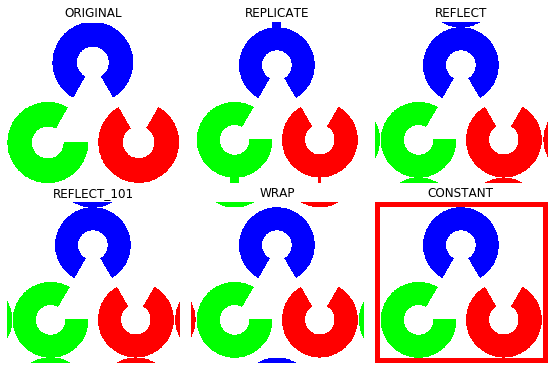

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

BLUE = [255, 0, 0]

img1 = cv2.imread('./images/opencv-logo.png')

replicate = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=BLUE)

plt.subplot(231), plt.imshow(img1, 'gray'), plt.axis('off'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.axis('off'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.axis('off'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.axis('off'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.axis('off'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.axis('off'), plt.title('CONSTANT')
plt.tight_layout(rect=(0, 0, 1.3, 1.3))
plt.show()